In [84]:
# import libraries
import sqlite3
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import numpy as np
from statistics import mean, stdev
from math import sqrt
from statsmodels.stats.power import TTestIndPower, TTestPower, tt_ind_solve_power

In [18]:
# investigate data
data = sqlite3.connect(r'C:\Users\Nick\Documents\Project 2\dsc-case-study-hypothesis-testing\data\northWind.sqlite')
df = pd.read_sql_query("SELECT * from Product", data)
df1 = pd.read_sql_query("SELECT * from OrderDetail", data)
df2 = pd.read_sql_query("SELECT * from Supplier", data)

In [46]:
df1.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [40]:
def bootstrap(array):
    return np.random.choice(array, size=array.shape, replace=True)

def generate_sample_means(array, n=100):
    sample_means = []
    for i in range(n):
        sample = bootstrap(array)
        mean = np.mean(sample)
        sample_means.append(mean)
    return sample_means

In [81]:
def cohens_d(x,y):
    return (mean(x) - mean(y)) / (sqrt((stdev(x) ** 2 + stdev(y) ** 2) / 2))

# Question 1: Is there a difference in quantity of products sold by discount rate? 

mu:0.0562 sigma:0.0835
t:0.6951 p:0.0


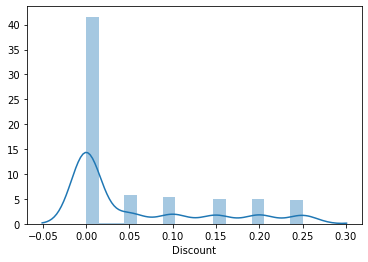

In [73]:
mu = df1['Discount'].mean()
sigma = df1['Discount'].std()
sns.distplot(df1['Discount']);
print("mu:" + str(round(mu, 4)),"sigma:" + str(round(sigma , 4)))

t, p = scs.shapiro(df1['Discount'])
print("t:" + str(round(t, 4)),"p:" + str(round(p , 4)))

# shapiro p is 0, so the data is not normal 
# need to use Central Limit Theorem to generate normal data

sample_means_discount = generate_sample_means(df1['Discount'])

mu:23.813 sigma:19.022
t:0.8515 p:0.0


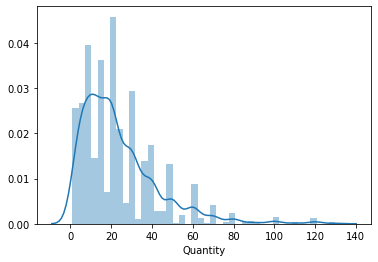

In [75]:
mu_q = df1['Quantity'].mean()
sigma_q = df1['Quantity'].std()
sns.distplot(df1['Quantity']);
print("mu:" + str(round(mu_q, 4)),"sigma:" + str(round(sigma_q , 4)))

t_q, p_q = scs.shapiro(df1['Quantity'])
print("t:" + str(round(t_q, 4)),"p:" + str(round(p_q, 4)))

# shapiro p is 0, so the data is not normal 
# need to use Central Limit Theorem to generate normal data

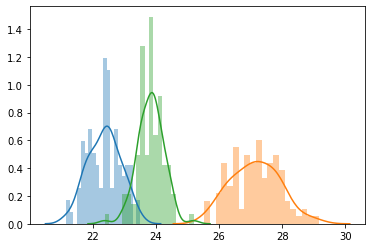

In [76]:
# separate the data into an upper and lower half by using the discount mean

df_lh_mean = df1.loc[df1['Discount'] <= df1['Discount'].mean()]
df_uh_mean = df1.loc[df1['Discount'] >= df1['Discount'].mean()]

# generate normal distributions about the upper and lower halves & full dataframe

sample_means_quantity_lower = generate_sample_means(df_lh_mean['Quantity'])
sample_means_quantity_upper = generate_sample_means(df_uh_mean['Quantity'])
sample_means_total = generate_sample_means(df1['Quantity'])

# plots all 3 distributions 

sns.distplot(sample_means_quantity_lower, label="Lower Half Sample", bins=20)
sns.distplot(sample_means_quantity_upper, label="Upper Half Sample", bins=20)
sns.distplot(sample_means_total, label="Sample", bins=20);

In [88]:
# by setting the equal variance condition to False, we specify that the function use Welch's t-test

t1, p1 = scs.ttest_ind(sample_means_quantity_lower, sample_means_quantity_upper, equal_var=False)
p1

7.957848194681243e-107

#### Welch's T-Test
H0: There is no relationship between discount rate and quantity of products sold

HA: A higher discount rate will lead to a greater quantity of products sold

## Conclusion

Given p < a we can reject the null hypothesis

## EffectSize/PowerAnalysis/Tukey Testing (if needed)

In [83]:
effect_size = cohens_d(sample_means_quantity_lower, sample_means_quantity_upper)
effect_size

-7.288006843930543

In [87]:
power_analysis = tt_ind_solve_power(effect_size = effect_size,
                                    nobs1=len(sample_means_quantity_upper),
                                    alpha = 0.05)
power_analysis

1.0

# Question 2: Is there a difference in number of orders and territory? 

In [2]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [4]:
# perform test

## Conclusion

# Question 3: {You decide}

# Question 1: Is there a difference in quantity of products sold by discount rate? 

In [2]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [4]:
# perform test

## Conclusion

## EffectSize/PowerAnalysis/Tukey Testing (if needed)

# Question 2: Is there a difference in number of orders and territory? 

In [2]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [4]:
# perform test

## Conclusion